<a href="https://colab.research.google.com/github/zadevaibhav45/ml-odel/blob/master/surived_1year_ex.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sbn
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
pharma_data = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Training_set_begs.csv')

In [3]:
pharma_data.head()

,ID_Patient_Care_Situation,Diagnosed_Condition,Patient_ID,Treated_with_drugs,Patient_Age,Patient_Body_Mass_Index,Patient_Smoker,Patient_Rural_Urban,Patient_mental_condition,A,B,C,D,E,F,Z,Number_of_prev_cond,Survived_1_year
0,22374,8,3333,DX6,56,18.479385,YES,URBAN,Stable,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.0,0
1,18164,5,5740,DX2,36,22.945566,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
2,6283,23,10446,DX6,48,27.510027,YES,RURAL,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0
3,5339,51,12011,DX1,5,19.130976,NO,URBAN,Stable,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1
4,33012,0,12513,NaN,128,1.348400,Cannot say,RURAL,Stable,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1


In [4]:
pharma_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 18 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID_Patient_Care_Situation  23097 non-null  int64  
 1   Diagnosed_Condition        23097 non-null  int64  
 2   Patient_ID                 23097 non-null  int64  
 3   Treated_with_drugs         23084 non-null  object 
 4   Patient_Age                23097 non-null  int64  
 5   Patient_Body_Mass_Index    23097 non-null  float64
 6   Patient_Smoker             23097 non-null  object 
 7   Patient_Rural_Urban        23097 non-null  object 
 8   Patient_mental_condition   23097 non-null  object 
 9   A                          21862 non-null  float64
 10  B                          21862 non-null  float64
 11  C                          21862 non-null  float64
 12  D                          21862 non-null  float64
 13  E                          21862 non-null  flo

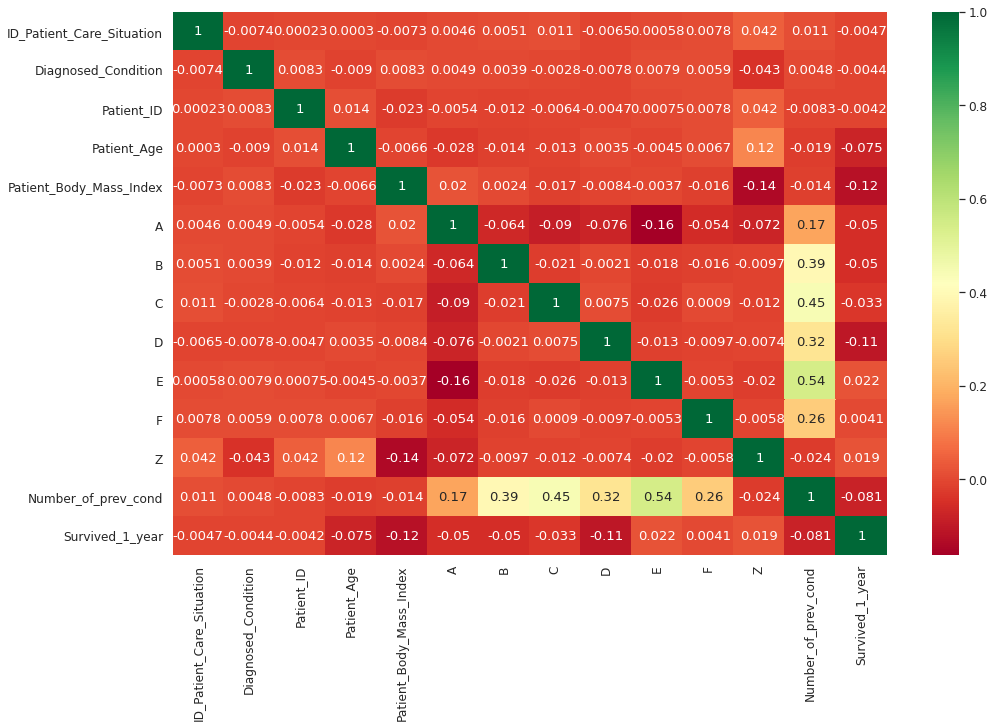

In [5]:
plt.figure(figsize=(16,10))
sbn.set(font_scale=1.1)
sbn.heatmap(pharma_data.corr(),annot=True,cmap="RdYlGn")
plt.show()

In [6]:
pharma_data_cat_conv=pd.get_dummies(pharma_data, columns=["Treated_with_drugs","Patient_Smoker","Patient_Rural_Urban","Patient_mental_condition"])
pharma_data_cat_conv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23097 entries, 0 to 23096
Data columns (total 52 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID_Patient_Care_Situation                23097 non-null  int64  
 1   Diagnosed_Condition                      23097 non-null  int64  
 2   Patient_ID                               23097 non-null  int64  
 3   Patient_Age                              23097 non-null  int64  
 4   Patient_Body_Mass_Index                  23097 non-null  float64
 5   A                                        21862 non-null  float64
 6   B                                        21862 non-null  float64
 7   C                                        21862 non-null  float64
 8   D                                        21862 non-null  float64
 9   E                                        21862 non-null  float64
 10  F                                        21862

In [7]:
pharma_data_cat_conv['A'].fillna(pharma_data_cat_conv['A'].mode()[0],inplace=True)
pharma_data_cat_conv['B'].fillna(pharma_data_cat_conv['B'].mode()[0],inplace=True)
pharma_data_cat_conv['C'].fillna(pharma_data_cat_conv['C'].mode()[0],inplace=True)
pharma_data_cat_conv['D'].fillna(pharma_data_cat_conv['D'].mode()[0],inplace=True)
pharma_data_cat_conv['E'].fillna(pharma_data_cat_conv['E'].mode()[0],inplace=True)
pharma_data_cat_conv['F'].fillna(pharma_data_cat_conv['F'].mode()[0],inplace=True)
pharma_data_cat_conv['Z'].fillna(pharma_data_cat_conv['Z'].mode()[0],inplace=True)

In [8]:
pharma_data_cat_conv.isna().sum()

ID_Patient_Care_Situation                     0
Diagnosed_Condition                           0
Patient_ID                                    0
Patient_Age                                   0
Patient_Body_Mass_Index                       0
A                                             0
B                                             0
C                                             0
D                                             0
E                                             0
F                                             0
Z                                             0
Number_of_prev_cond                        1235
Survived_1_year                               0
Treated_with_drugs_DX1                        0
Treated_with_drugs_DX1 DX2                    0
Treated_with_drugs_DX1 DX2 DX3                0
Treated_with_drugs_DX1 DX2 DX3 DX4            0
Treated_with_drugs_DX1 DX2 DX3 DX4 DX5        0
Treated_with_drugs_DX1 DX2 DX3 DX5            0
Treated_with_drugs_DX1 DX2 DX4          

In [10]:
y = pharma_data_cat_conv[['Survived_1_year']]   
X = pharma_data_cat_conv.drop(['Survived_1_year'], axis=1)

In [11]:
X=X.drop(['Patient_ID','ID_Patient_Care_Situation'], axis=1)

In [12]:
X=X.drop(['Number_of_prev_cond'], axis=1)
X.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Treated_with_drugs_DX1,Treated_with_drugs_DX1 DX2,Treated_with_drugs_DX1 DX2 DX3,Treated_with_drugs_DX1 DX2 DX3 DX4,Treated_with_drugs_DX1 DX2 DX3 DX4 DX5,Treated_with_drugs_DX1 DX2 DX3 DX5,Treated_with_drugs_DX1 DX2 DX4,Treated_with_drugs_DX1 DX2 DX4 DX5,Treated_with_drugs_DX1 DX2 DX5,Treated_with_drugs_DX1 DX3,Treated_with_drugs_DX1 DX3 DX4,Treated_with_drugs_DX1 DX3 DX4 DX5,Treated_with_drugs_DX1 DX3 DX5,Treated_with_drugs_DX1 DX4,Treated_with_drugs_DX1 DX4 DX5,Treated_with_drugs_DX1 DX5,Treated_with_drugs_DX2,Treated_with_drugs_DX2 DX3,Treated_with_drugs_DX2 DX3 DX4,Treated_with_drugs_DX2 DX3 DX4 DX5,Treated_with_drugs_DX2 DX3 DX5,Treated_with_drugs_DX2 DX4,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
0,8,56,18.479385,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,1
1,5,36,22.945566,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1
2,23,48,27.510027,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,1
3,51,5,19.130976,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
4,0,128,1.348400,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1


In [13]:
from sklearn.preprocessing import MinMaxScaler

In [14]:
norm = MinMaxScaler().fit(X)
X_norm = pd.DataFrame(norm.transform(X))
X_norm.columns=X.columns

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val =train_test_split(X_norm, y, 
                                                    test_size=0.2, 
                                                    random_state=1)

In [17]:
X_train.head()

,Diagnosed_Condition,Patient_Age,Patient_Body_Mass_Index,A,B,C,D,E,F,Z,Treated_with_drugs_DX1,Treated_with_drugs_DX1 DX2,Treated_with_drugs_DX1 DX2 DX3,Treated_with_drugs_DX1 DX2 DX3 DX4,Treated_with_drugs_DX1 DX2 DX3 DX4 DX5,Treated_with_drugs_DX1 DX2 DX3 DX5,Treated_with_drugs_DX1 DX2 DX4,Treated_with_drugs_DX1 DX2 DX4 DX5,Treated_with_drugs_DX1 DX2 DX5,Treated_with_drugs_DX1 DX3,Treated_with_drugs_DX1 DX3 DX4,Treated_with_drugs_DX1 DX3 DX4 DX5,Treated_with_drugs_DX1 DX3 DX5,Treated_with_drugs_DX1 DX4,Treated_with_drugs_DX1 DX4 DX5,Treated_with_drugs_DX1 DX5,Treated_with_drugs_DX2,Treated_with_drugs_DX2 DX3,Treated_with_drugs_DX2 DX3 DX4,Treated_with_drugs_DX2 DX3 DX4 DX5,Treated_with_drugs_DX2 DX3 DX5,Treated_with_drugs_DX2 DX4,Treated_with_drugs_DX2 DX4 DX5,Treated_with_drugs_DX2 DX5,Treated_with_drugs_DX3,Treated_with_drugs_DX3 DX4,Treated_with_drugs_DX3 DX4 DX5,Treated_with_drugs_DX3 DX5,Treated_with_drugs_DX4,Treated_with_drugs_DX4 DX5,Treated_with_drugs_DX5,Treated_with_drugs_DX6,Patient_Smoker_Cannot say,Patient_Smoker_NO,Patient_Smoker_YES,Patient_Rural_Urban_RURAL,Patient_Rural_Urban_URBAN,Patient_mental_condition_Stable
911,0.634615,0.261745,0.825226,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
20955,0.538462,0.147651,0.638084,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0
16399,0.692308,0.221477,0.915629,1.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
17062,0.519231,0.429530,0.722185,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
9793,0.884615,0.154362,0.896350,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0


In [22]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define initial model. Specify a number for seed to ensure same results each run
clf_lr = XGBClassifier(learning_rate =0.1,
n_estimators=500,
max_depth=5,
min_child_weight=1,
gamma=0,
subsample=0.8,
colsample_bytree=0.8,
objective= 'binary:logistic',
nthread=4,
scale_pos_weight=1,
seed=1)
optimization_dict = {"boosting_type": ['gbdt','dart'],
"n_estimators"     : [200,500,800,1100,1400,1700,2000],
"learning_rate"    : list(np.logspace(np.log10(0.005), np.log10(0.5), base = 10, num = 1000)) ,
"max_depth"        : [3,5,7,9,11,13,15,17,19,21,23],
'silent': [False],
'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
'colsample_bytree': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
'colsample_bylevel': [0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
'min_child_weight': [0.5, 1.0, 3.0, 5.0, 7.0, 10.0],
'gamma': [0, 0.25, 0.5, 1.0],
'reg_lambda': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
'reg_alpha': [0.1, 1.0, 5.0, 10.0, 50.0, 100.0]}

model = RandomizedSearchCV(clf_lr, optimization_dict, 
                     scoring='roc_auc', n_iter=10, verbose=1,n_jobs=4,iid=False, cv=2)
lr_baseline_model = model.fit(X_train,y_train)

Fitting 2 folds for each of 10 candidates, totalling 20 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  20 out of  20 | elapsed:  4.2min finished
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:823: FutureWarning: The parameter 'iid' is deprecated in 0.22 and will be removed in 0.24.
  "removed in 0.24.", FutureWarning
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [23]:
lr_baseline_model.best_params_, lr_baseline_model.best_score_

({'boosting_type': 'dart',
  'colsample_bylevel': 0.7,
  'colsample_bytree': 0.7,
  'gamma': 0.5,
  'learning_rate': 0.13880766472183995,
  'max_depth': 3,
  'min_child_weight': 1.0,
  'n_estimators': 200,
  'reg_alpha': 5.0,
  'reg_lambda': 1.0,
  'silent': False,
  'subsample': 1.0},
 0.9152557077054624)

In [24]:
model = XGBClassifier(**lr_baseline_model.best_params_,
 objective= 'binary:logistic',
 nthread=4,
 scale_pos_weight=1,
 random_state=1)

lr_baseline_model_op = model.fit(X_train,y_train)
y_val_pred = lr_baseline_model_op.predict(X_val)
y_train_pred=lr_baseline_model_op.predict(X_train)
from sklearn.metrics import accuracy_score,f1_score
ac_score = accuracy_score(y_val, y_val_pred)
f_score = f1_score(y_val, y_val_pred)
ac_score_train = accuracy_score(y_train,y_train_pred)
f_score_train = f1_score(y_train,y_train_pred)

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [26]:
print("Validation accuracy score:", ac_score)
print("Validation F1 Score:", f_score)
print("Train accuracy score:", ac_score_train)
print("Train F1 Score:", f_score_train)

Validation accuracy score: 0.8393939393939394
Validation F1 Score: 0.8749578699022582
Train accuracy score: 0.8395843481084592
Train F1 Score: 0.8763969974979149


In [27]:

test_new = pd.read_csv('https://raw.githubusercontent.com/dphi-official/Datasets/master/pharma_data/Testing_set_begs.csv')

In [28]:
test_new.isna().sum()

ID_Patient_Care_Situation    0
Diagnosed_Condition          0
Patient_ID                   0
Treated_with_drugs           0
Patient_Age                  0
Patient_Body_Mass_Index      0
Patient_Smoker               0
Patient_Rural_Urban          0
Patient_mental_condition     0
A                            0
B                            0
C                            0
D                            0
E                            0
F                            0
Z                            0
Number_of_prev_cond          0
dtype: int64

In [29]:
test_new=pd.get_dummies(test_new, columns=["Treated_with_drugs","Patient_Smoker","Patient_Rural_Urban","Patient_mental_condition"])
test_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9303 entries, 0 to 9302
Data columns (total 50 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   ID_Patient_Care_Situation                9303 non-null   int64  
 1   Diagnosed_Condition                      9303 non-null   int64  
 2   Patient_ID                               9303 non-null   int64  
 3   Patient_Age                              9303 non-null   int64  
 4   Patient_Body_Mass_Index                  9303 non-null   float64
 5   A                                        9303 non-null   float64
 6   B                                        9303 non-null   float64
 7   C                                        9303 non-null   float64
 8   D                                        9303 non-null   float64
 9   E                                        9303 non-null   float64
 10  F                                        9303 no

In [30]:
test_new.loc[:,'Patient_Smoker_Cannot say']=0

In [31]:
test_new = test_new[['Diagnosed_Condition', 'Patient_Age', 'Patient_Body_Mass_Index', 'A',
       'B', 'C', 'D', 'E', 'F', 'Z', 'Number_of_prev_cond',
       'Treated_with_drugs_DX1 ', 'Treated_with_drugs_DX1 DX2 ',
       'Treated_with_drugs_DX1 DX2 DX3 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX3 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX4 ',
       'Treated_with_drugs_DX1 DX2 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX2 DX5 ', 'Treated_with_drugs_DX1 DX3 ',
       'Treated_with_drugs_DX1 DX3 DX4 ',
       'Treated_with_drugs_DX1 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX1 DX3 DX5 ', 'Treated_with_drugs_DX1 DX4 ',
       'Treated_with_drugs_DX1 DX4 DX5 ', 'Treated_with_drugs_DX1 DX5 ',
       'Treated_with_drugs_DX2 ', 'Treated_with_drugs_DX2 DX3 ',
       'Treated_with_drugs_DX2 DX3 DX4 ',
       'Treated_with_drugs_DX2 DX3 DX4 DX5 ',
       'Treated_with_drugs_DX2 DX3 DX5 ', 'Treated_with_drugs_DX2 DX4 ',
       'Treated_with_drugs_DX2 DX4 DX5 ', 'Treated_with_drugs_DX2 DX5 ',
       'Treated_with_drugs_DX3 ', 'Treated_with_drugs_DX3 DX4 ',
       'Treated_with_drugs_DX3 DX4 DX5 ', 'Treated_with_drugs_DX3 DX5 ',
       'Treated_with_drugs_DX4 ', 'Treated_with_drugs_DX4 DX5 ',
       'Treated_with_drugs_DX5 ', 'Treated_with_drugs_DX6','Patient_Smoker_Cannot say',
       'Patient_Smoker_NO', 'Patient_Smoker_YES', 'Patient_Rural_Urban_RURAL',
       'Patient_Rural_Urban_URBAN', 'Patient_mental_condition_Stable',
       ]]

In [32]:
test_new.drop('Number_of_prev_cond',axis=1,inplace=True)

In [33]:
test_new_norm = pd.DataFrame(norm.transform(test_new),columns=test_new.columns)

In [44]:
preds_test= lr_baseline_model_op.predict(test_new_norm)



res = pd.DataFrame({'Id':test_new_norm.index,
                       'Survived_1_year': preds_test})

from google.colab import files
res.to_csv('prediction_results_HP.csv')
files.download('prediction_results_HP.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>